In [4]:
#importing the requires packages for EDA and preprosessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [5]:
#importing the scv file using pandas
df = pd.read_csv("abalone.csv")

In [6]:
#viewing the forst 5 records for my dataframe
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [7]:
df.shape

(4177, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [9]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [11]:
#by using label_encoder i have converted SEX columns from object to numeric
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['Sex']= label_encoder.fit_transform(df['Sex'])
  


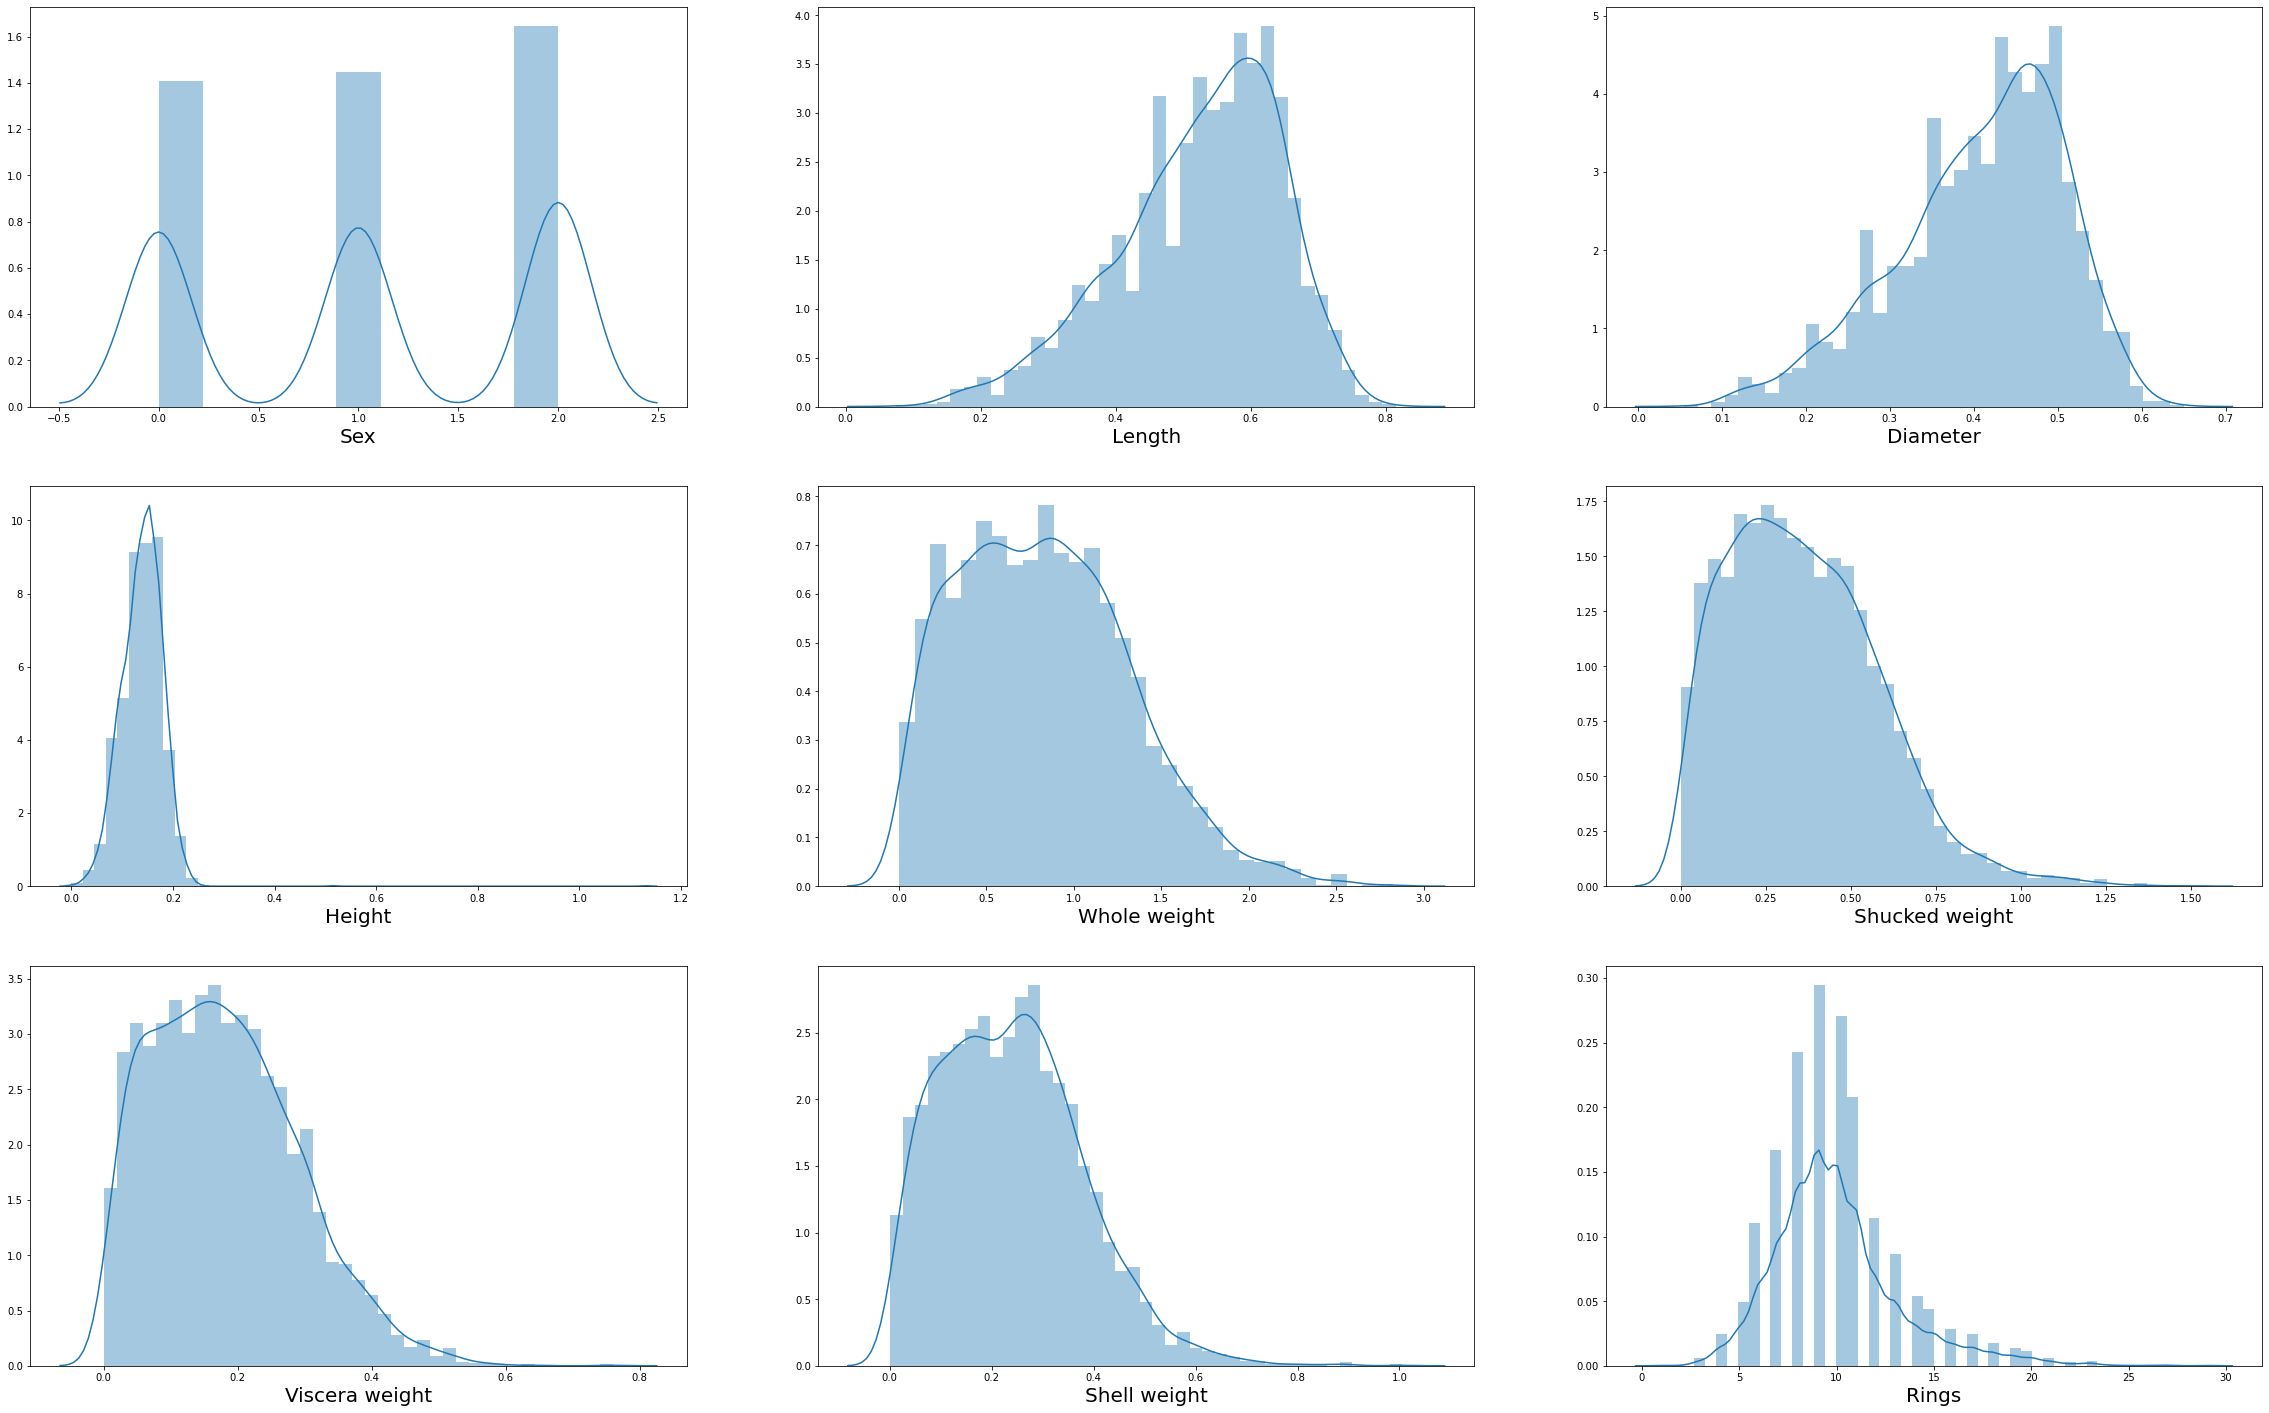

In [12]:
#plotting distribution plot for my dataframe to check and remove outliers
plt.figure(figsize=(40,25),facecolor="white")
plotnumber = 1

for column in df:
    
    if(df[column].dtype == np.float64 or df[column].dtype == np.int64):
        if plotnumber<=9:
            ax = plt.subplot(3,3,plotnumber)
            sns.distplot(df[column])
            plt.xlabel(column,fontsize=20)
       
    plotnumber +=1
plt.show()

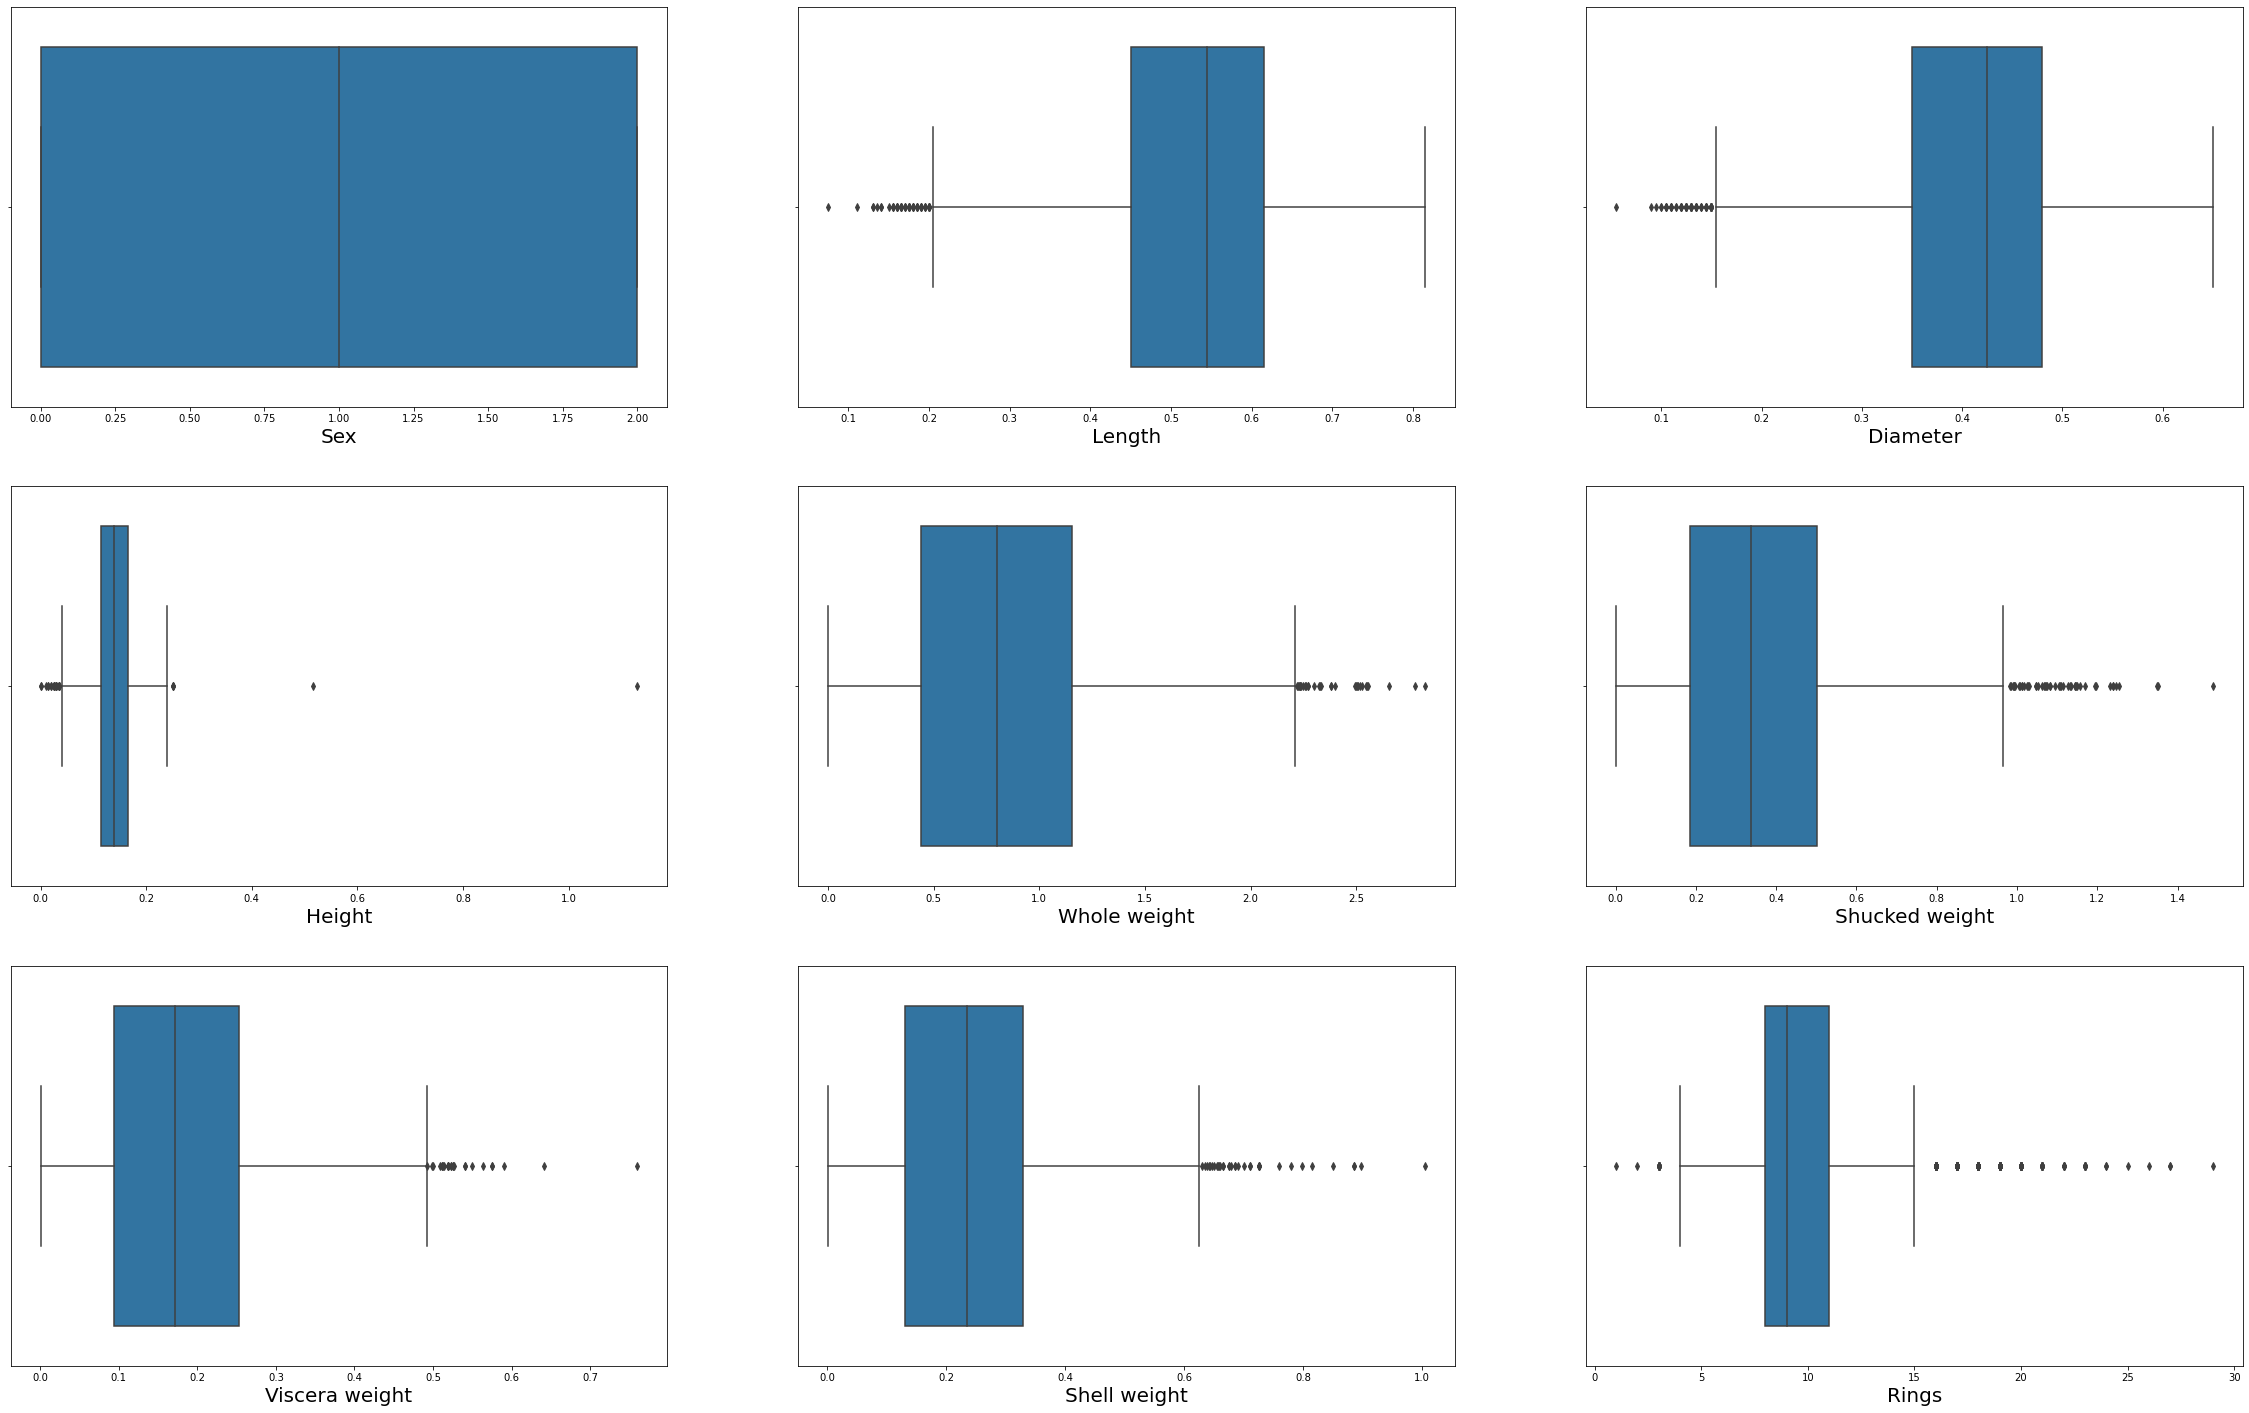

In [13]:
#plotting distribution plot for my dataframe to check and remove outliers
plt.figure(figsize=(40,25),facecolor="white")
plotnumber = 1

for column in df:
    
    if(df[column].dtype == np.float64 or df[column].dtype == np.int64):
        if plotnumber<=9:
            ax = plt.subplot(3,3,plotnumber)
            sns.boxplot(df[column])
            plt.xlabel(column,fontsize=20)
       
    plotnumber +=1
plt.show()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int64  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 293.8 KB


In [17]:
#checking for Z score to remove outliers
from scipy import stats

z = np.abs(stats.zscore(df))

print(z)

[[1.15198011 0.57455813 0.43214879 ... 0.72621157 0.63821689 1.57154357]
 [1.15198011 1.44898585 1.439929   ... 1.20522124 1.21298732 0.91001299]
 [1.28068972 0.05003309 0.12213032 ... 0.35668983 0.20713907 0.28962385]
 ...
 [1.15198011 0.6329849  0.67640943 ... 0.97541324 0.49695471 0.28962385]
 [1.28068972 0.84118198 0.77718745 ... 0.73362741 0.41073914 0.02057072]
 [1.15198011 1.54905203 1.48263359 ... 1.78744868 1.84048058 0.64095986]]


In [18]:
index = (np.where(z>3)[0])

In [19]:
index

array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
        754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
       1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
       1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
       1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
       1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
       2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
       2436, 2459, 2471, 2544, 2623, 2624, 2624, 26

In [20]:
df = df.drop(df.index[index])

In [21]:
df.shape

(4027, 9)

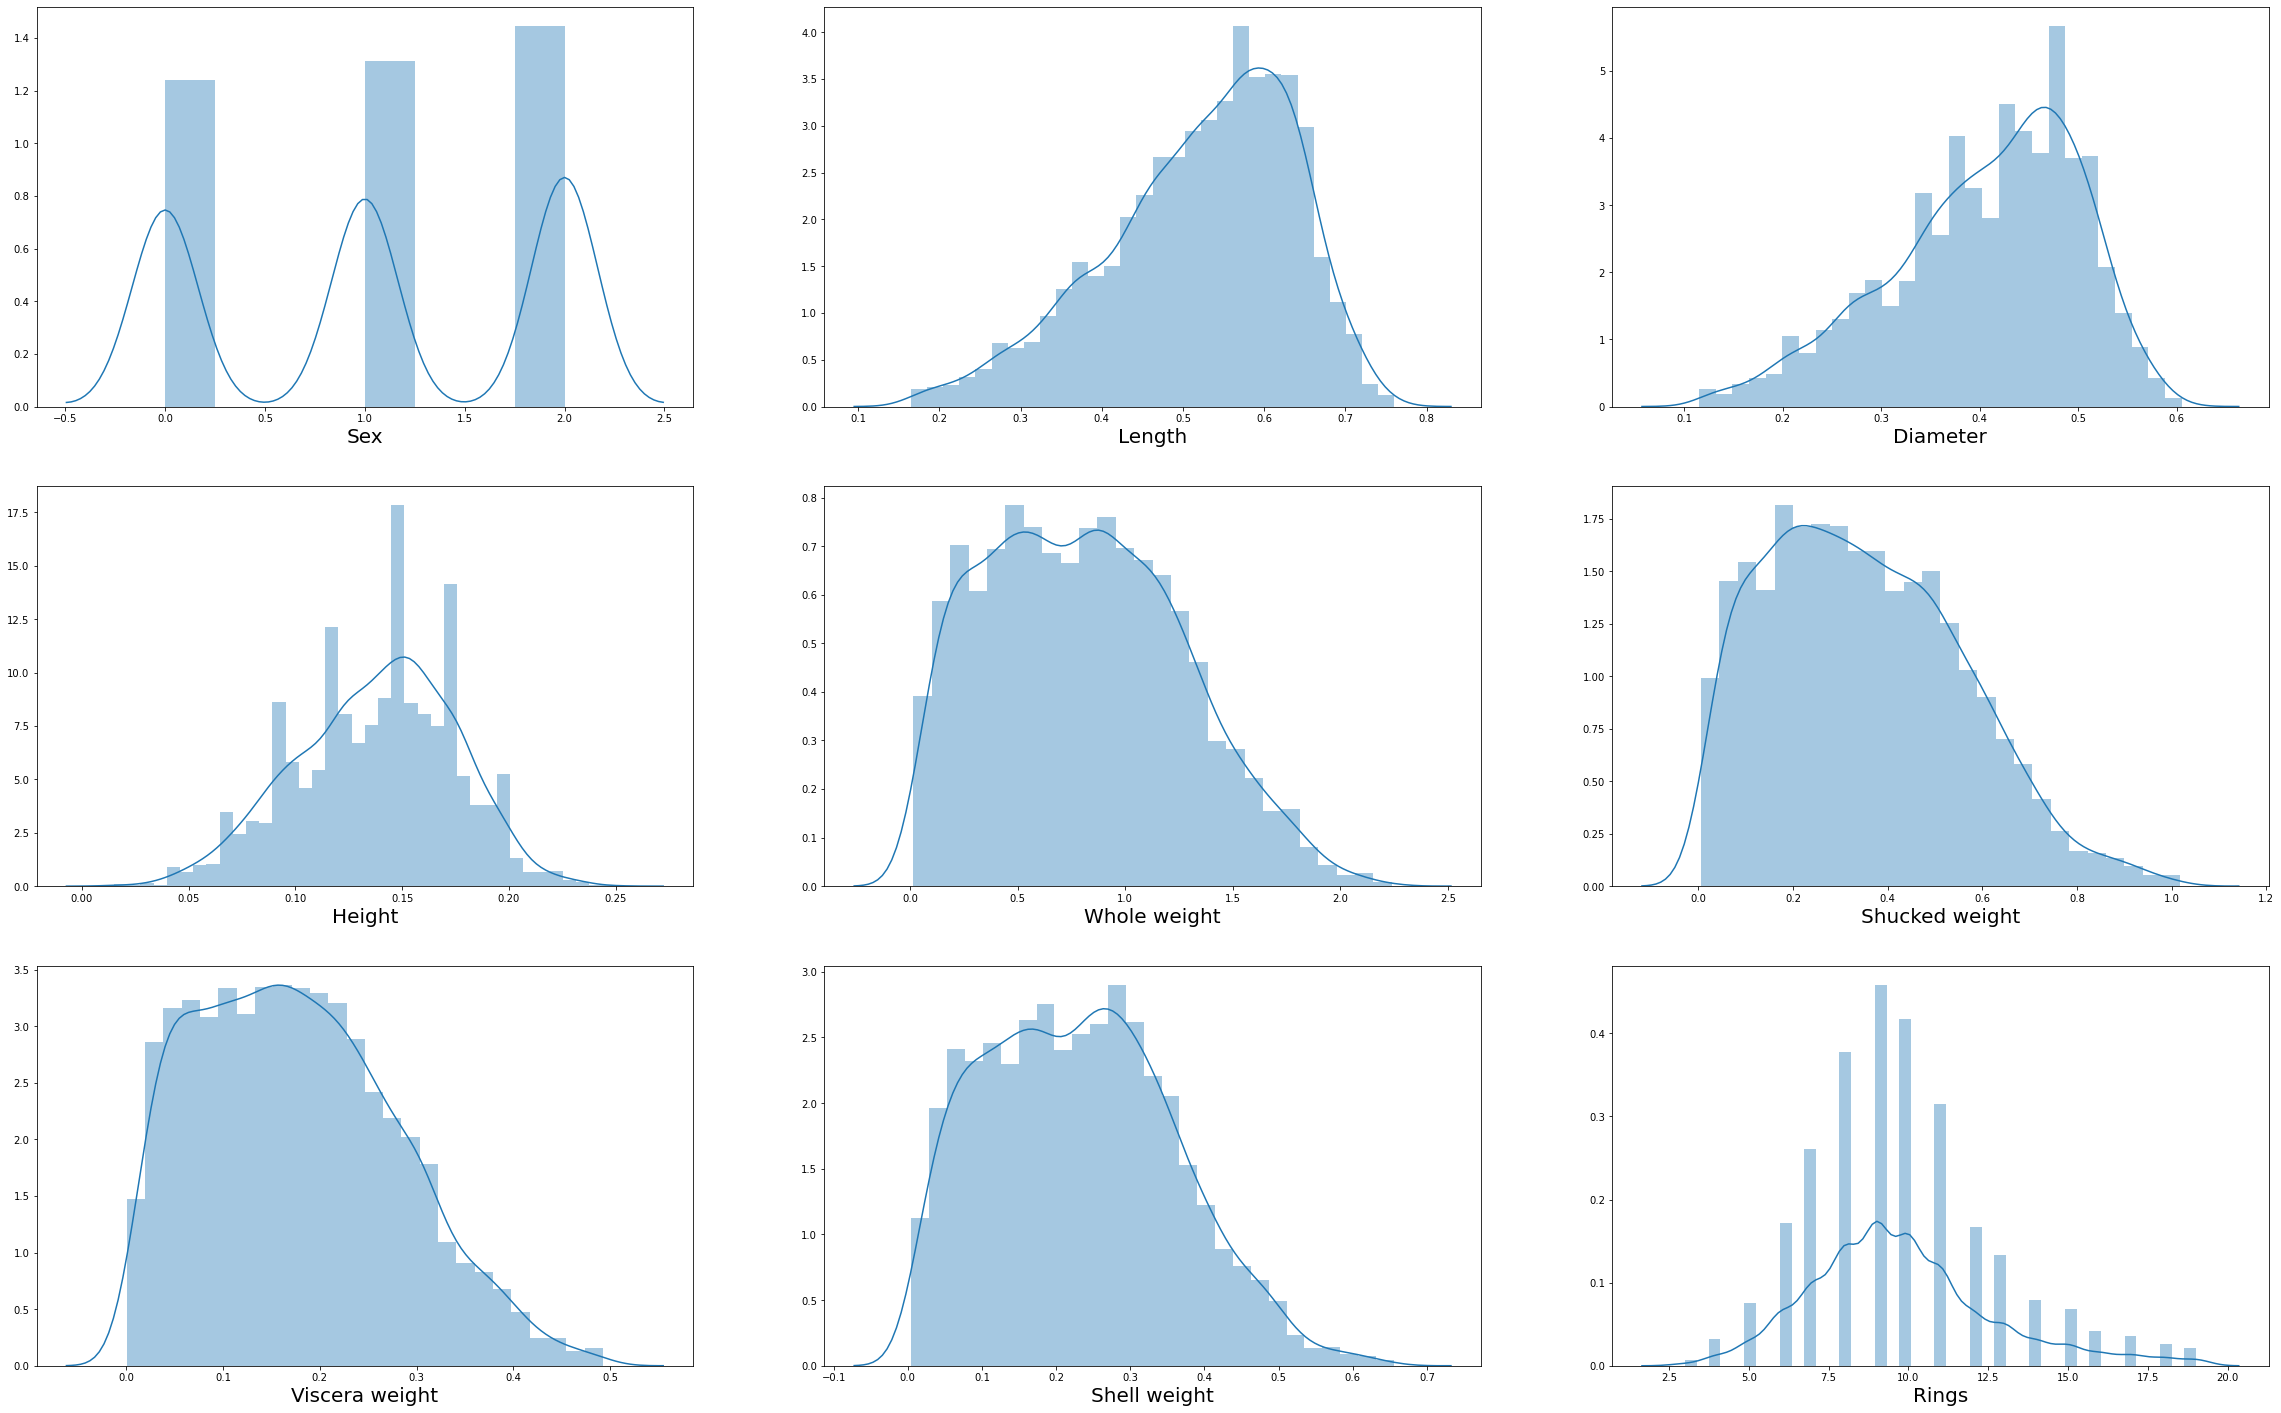

In [23]:
#plotting distribution plot for my dataframe to check removed outliers
plt.figure(figsize=(40,25),facecolor="white")
plotnumber = 1

for column in df:
    
    if(df[column].dtype == np.float64 or df[column].dtype == np.int64):
        if plotnumber<=9:
            ax = plt.subplot(3,3,plotnumber)
            sns.distplot(df[column])
            plt.xlabel(column,fontsize=20)
       
    plotnumber +=1
plt.show()

In [24]:
#just to check correlation of the data between features
corr_mat = df.corr()

<function matplotlib.pyplot.show(*args, **kw)>

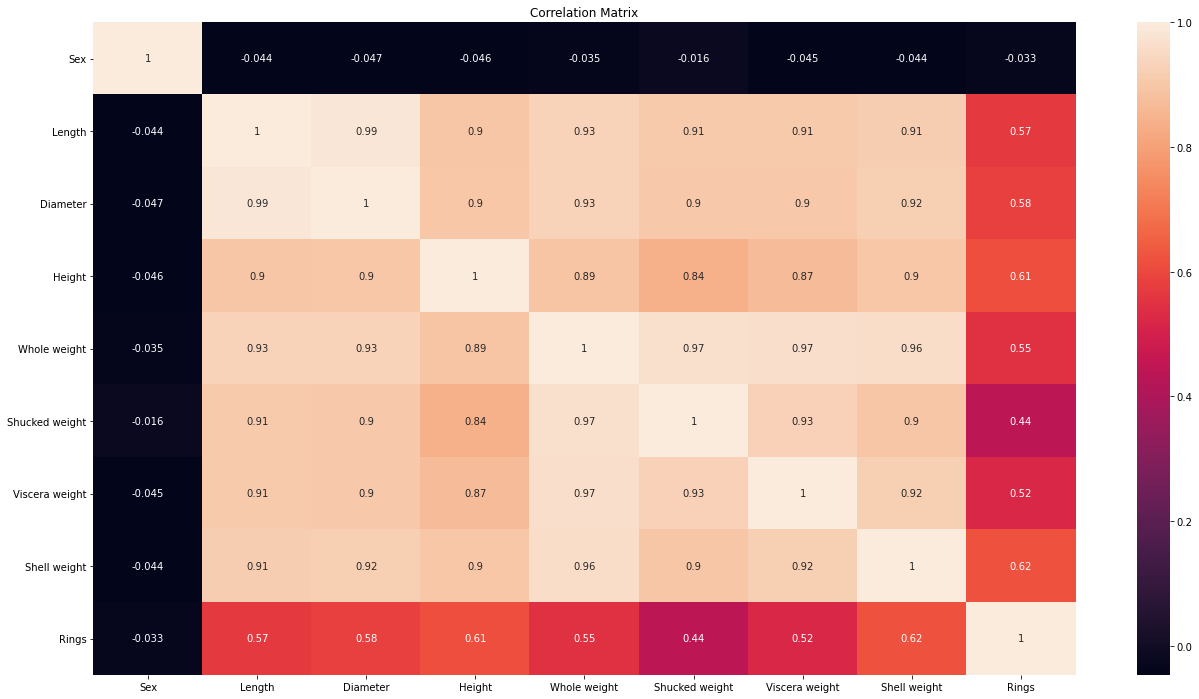

In [25]:
#Visualising heatmap for corr_mat and concluded features are corelated will take of this later on 
plt.figure(figsize=(22,12),facecolor="white")
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show

In [27]:
#Seprating my features and labels
X = df.drop(['Rings'], axis = 1)
y = df['Rings']

In [28]:
#Buliding a stats model
import statsmodels.api as sm
 
Xc = sm.add_constant(X)
lr = sm.OLS(y, Xc).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     531.1
Date:                Thu, 08 Jul 2021   Prob (F-statistic):               0.00
Time:                        18:16:32   Log-Likelihood:                -8499.1
No. Observations:                4027   AIC:                         1.702e+04
Df Residuals:                    4018   BIC:                         1.707e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.6044      0.279      9.333      0.000       2.057       3.152
Sex                0.0629      0.039      1.625      0.104      -0.013       0.139
Length            -1.9796      1.696     -1.167      0.243      -5.305       1.345
Diameter          12.0309      2.089      5.758      0.000       7.935      16.127
Height            22.5611      2.186     10.322      0.000      18.276      26.846
Whole weight       7.5742      0.718     10.553      0.000       6.167       8.981
Shucked weight   -18.1736      0.816    -22.276      0.000     -19.773     -16.574
Viscera weight    -7.2176      1.260     -5.728      0.000      -9.688      -4.747
Shell weight       7.1180      1.194      5.964      0.000       4.778       9.458
==============================================================================
Omnibus:                      653.993   Durbin-Watson:                   1.380
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1206.516
Skew:                           1.018   Prob(JB):                    1.02e-262
Kurtosis:                       4.744   Cond. No.                         161.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
X.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [30]:
#Checking VIF for all my features
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

vif = [VIF(Xc.values, i) for i in range(Xc.shape[1])]
pd.DataFrame(vif, index=Xc.columns, columns=['VIF'])

,VIF
const,78.468618
Sex,1.009229
Length,38.928927
Diameter,40.446626
Height,6.545434
Whole weight,107.994846
Shucked weight,28.566582
Viscera weight,17.084642
Shell weight,23.491177


In [31]:
#Checking VIF By dropping One column
X2 = X.drop(['Whole weight'], axis = 1)
X2c = sm.add_constant(X2)

vif = [VIF(X2c.values, i) for i in range(X2c.shape[1])]
pd.DataFrame(vif, index =X2c.columns, columns=['VIF'])

,VIF
const,78.304639
Sex,1.009113
Length,38.928926
Diameter,40.442393
Height,6.543422
Shucked weight,9.223602
Viscera weight,10.772491
Shell weight,10.258234


In [32]:
#Checking VIF By dropping Two columns
X2 = X.drop(['Whole weight', 'Diameter'], axis = 1)
X2c = sm.add_constant(X2)

vif = [VIF(X2c.values, i ) for i in range(X2c.shape[1])]
pd.DataFrame(vif, index=X2c.columns, columns=['VIF'])

,VIF
const,78.289484
Sex,1.008705
Length,9.596262
Height,6.401361
Shucked weight,9.215078
Viscera weight,10.737785
Shell weight,9.825881


In [33]:
#Checking VIF By dropping Three columns
X3 = X.drop(['Whole weight','Diameter','Viscera weight'], axis=1)
X3c = sm.add_constant(X3)

vif = [VIF(X3c.values, i) for i in range(X3c.shape[1])]
pd.DataFrame(vif, index=X3c.columns, columns=['VIF'])

,VIF
const,75.871052
Sex,1.006335
Length,9.461747
Height,6.321326
Shucked weight,6.801555
Shell weight,8.768306


In [34]:
lr = sm.OLS(y, X3c).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     792.4
Date:                Thu, 08 Jul 2021   Prob (F-statistic):               0.00
Time:                        18:18:16   Log-Likelihood:                -8571.0
No. Observations:                4027   AIC:                         1.715e+04
Df Residuals:                    4021   BIC:                         1.719e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.4665      0.279      8.833      0.000       1.919       3.014
Sex                0.0529      0.039      1.346      0.178      -0.024       0.130
Length             6.7066      0.851      7.882      0.000       5.038       8.375
Height            24.9834      2.186     11.429      0.000      20.698      29.269
Shucked weight   -10.8798      0.405    -26.856      0.000     -11.674     -10.086
Shell weight      17.6567      0.742     23.794      0.000      16.202      19.112
==============================================================================
Omnibus:                      703.789   Durbin-Watson:                   1.361
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1339.893
Skew:                           1.073   Prob(JB):                    1.11e-291
Kurtosis:                       4.838   Cond. No.                         119.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
import statsmodels.stats.api as sms
sms.het_goldfeldquandt(lr.resid, X3c)

#The pvalue is 0.6830, so it can be said that the variance of error is constant across the range of data.Dropping the feature with high p-value

(0.978960256361838, 0.6830716127065427, 'increasing')

In [37]:
while len(X3.columns)>0:
    X_c = sm.add_constant(X3)
    mod = sm.OLS(y,X_c).fit()
    f = mod.pvalues[1:].idxmax()
    if mod.pvalues[1:].max()>0.05:
        X3 = X3.drop(f, axis=1)
    else:
        break

print("The final features are:",X3.columns)

The final features are: Index(['Length', 'Height', 'Shucked weight', 'Shell weight'], dtype='object')


In [38]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     989.8
Date:                Thu, 08 Jul 2021   Prob (F-statistic):               0.00
Time:                        18:20:26   Log-Likelihood:                -8571.9
No. Observations:                4027   AIC:                         1.715e+04
Df Residuals:                    4022   BIC:                         1.719e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.5401      0.274      9.275      0.000       2.003       3.077
Length             6.6693      0.851      7.842      0.000       5.002       8.337
Height            24.9481      2.186     11.413      0.000      20.662      29.234
Shucked weight   -10.8448      0.404    -26.822      0.000     -11.637     -10.052
Shell weight      17.6313      0.742     23.765      0.000      16.177      19.086
==============================================================================
Omnibus:                      701.088   Durbin-Watson:                   1.361
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1331.422
Skew:                           1.071   Prob(JB):                    7.68e-290
Kurtosis:                       4.831   Cond. No.                         84.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
X = df.drop('Rings', axis=1)
y = df['Rings']

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [41]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [42]:
X_trains = ss.fit_transform(X_train)
X_tests = ss.transform(X_test)

In [43]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train , y_train)
pred = lr.predict(X_test)

In [44]:
from sklearn.metrics import r2_score, roc_auc_score, mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, pred))
r2 = r2_score(y_test, pred)

In [45]:
print("The root mean Sq error calculated from the base model is:",rmse)
print("The r2-score is:",r2)

The root mean Sq error calculated from the base model is: 1.962977043100474
The r2-score is: 0.5408922895175348


In [46]:
from sklearn.feature_selection import RFE
lr = LinearRegression()
n =[{'n_features_to_select':list(range(1,10))}]
rfe =RFE(lr)

from sklearn.model_selection import GridSearchCV
gsearch = GridSearchCV(rfe, param_grid=n, cv=3)
gsearch.fit(X, y)

gsearch.best_params_

{'n_features_to_select': 8}

In [47]:
lr = LinearRegression()
rfe =RFE(lr, n_features_to_select=8)
rfe.fit(X,y)

pd.DataFrame(rfe.ranking_, index=X.columns, columns=['Rank'])

,Rank
Sex,1
Length,1
Diameter,1
Height,1
Whole weight,1
Shucked weight,1
Viscera weight,1
Shell weight,1


In [48]:
from sklearn.linear_model import Lasso, LassoCV

lasso = Lasso(alpha = 0.1)
lasso.fit(X,y)
pd.DataFrame(lasso.coef_, index=X.columns, columns = ['Coefs'])

,Coefs
Sex,-0.00000
Length,0.00000
Diameter,0.00000
Height,0.00000
Whole weight,2.96243
Shucked weight,-0.00000
Viscera weight,0.00000
Shell weight,0.00000


In [49]:
alphas = np.linspace(0.001, 0.1, 100)
lassocv = LassoCV(alphas=alphas, cv = 3, random_state=1, max_iter = 5000)
lassocv.fit(X,y)
lassocv.alpha_

0.001

In [50]:
lasso = Lasso(alpha = lassocv.alpha_, max_iter=5000)
lasso.fit(X,y)
pd.DataFrame(lasso.coef_, index=X.columns, columns=['Coefs'])

,Coefs
Sex,0.059365
Length,0.000000
Diameter,9.735442
Height,18.901906
Whole weight,6.703048
Shucked weight,-17.352936
Viscera weight,-5.056616
Shell weight,8.145272


In [51]:
from sklearn.model_selection import cross_val_score

res=cross_val_score(lasso, X, y, cv=3, scoring='neg_mean_squared_error')
rmse_lasso = np.sqrt(abs(res))
print("The RMSE for Lasso regression is:", rmse_lasso.mean())

The RMSE for Lasso regression is: 2.025310329932521


In [52]:
from sklearn.linear_model import Ridge, RidgeCV
ridge =Ridge(alpha = 0.5)
ridge.fit(X, y)
pd.DataFrame(ridge.coef_, index=X.columns, columns =['Coefs'])

,Coefs
Sex,0.057962
Length,1.026852
Diameter,9.128289
Height,15.032661
Whole weight,6.547526
Shucked weight,-16.968326
Viscera weight,-5.295866
Shell weight,8.865541


In [ ]:
alphas = np.logspace(-2,0,1000)
ridgecv = RidgeCV(alphas=alphas, cv=3)
ridgecv.fit(X, y)
ridgecv.alpha_

In [ ]:
ridge = Ridge(alpha = ridgecv.alpha_)
ridge.fit(X, y)
pd.DataFrame(ridge.coef_, index=X.columns, columns=['Coefs'])

In [ ]:
res = cross_val_score(ridge,X,y,cv=3, scoring='neg_mean_squared_error')
rmse_ridge = np.sqrt(abs(res))
print("the RMSE for Ridge regression is :", rmse_ridge.mean())

In [ ]:
model = []
names = ['SVM','Random Forest','Gradient Boost','K-Nearest Neighbors']
for model,name in zip(model,names):
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
    rmse = np.sqrt(mean_squared_error(y, cross_val_predict(model, X , y, cv=3)))
    results.append(rmse)
    names.append(name)
    msg = "%s: %f" % (name, rmse)
    print(msg)

In [48]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn import model_selection
from sklearn.model_selection import cross_val_predict

models = [ SVR(),
         RandomForestRegressor(),
         GradientBoostingRegressor(),
         KNeighborsRegressor(n_neighbors = 4)]
results = []

names =[ 'SVM', 'Random Forest', 'Gradient Boost', 'K-Nearest Neighbors']
for model, name in zip(models, names):
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold)
    rmse = np.sqrt(mean_squared_error(y, cross_val_predict(model, X,y,cv=3)))
    results.append(rmse)
    names.append(name)
    msg = "%s: %f" %(name,rmse)
    print(msg)

SVM: 2.082239
Random Forest: 1.984578
Gradient Boost: 1.968865
K-Nearest Neighbors: 2.086710
